# Impoart

In [1]:
import import_ipynb
import MaskRCNN_VOC as mrv


import tqdm
import torch
import torchvision

import pickle




import numpy as np
import bbox_visualizer as bbv
import matplotlib.pyplot as plt


from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation as Task
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation_Dataset as TaskDataset
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation_DataLoader as TaskDataloader

np.random.seed(0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

importing Jupyter notebook from MaskRCNN_VOC.ipynb


/opt/conda/lib/python3.8/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


importing Jupyter notebook from mh_utils.ipynb
-3
-2


device(type='cuda', index=0)

##### Dataset (Pascal VOC 2012)

In [2]:
train_dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "train", cropping = False, mask_expending = False, flip = False, jitter = False)
train_data_loader = TaskDataloader(train_dataset, batch_size = 10)

val_dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "val")
val_data_loader = TaskDataloader(train_dataset, batch_size = 10)

##### Train

In [3]:
CLASS_NUM = Task.CLASS_NUM
MASK_THRESHOLD = 0.5
SCORE_THRESHOLDS = Task.SCORE_THRESHOLDS

def train_val(model, train_data_loader, val_data_loader, epoch, 
    val_frequence = 1, print_frequency = 999999999, save_frequency = 999999999, save_path = "models/model"):
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, weight_decay=0.0005)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.95 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    train_loss_list, val_loss_list = [], []

    for e in range(1, epoch+1):
        # train_loss 계산 및 학습
        train_loss = mrv.train(model, train_data_loader, optimizer, scheduler, device)
        train_loss_list.append(train_loss)

        # val_frequence 마다 한 번씩 val_loss 계산
        val_loss = Task.loss_eval(model, device, val_data_loader) if (e % val_frequence == 0) else val_loss_list[-1]        
        val_loss_list.append(val_loss)

        # print_frequency마다 한번 씩 loss 출력
        if e % print_frequency == 0:
            print(f"epoch({e+1}) train_loss: {train_loss} val_loss: {val_loss}")

        if e%save_frequency == 0:
            torch.save(model.state_dict(), f"{save_path}({e}-epoch)")
        

    return {"train_loss_list": train_loss_list, "val_loss_list": val_loss_list}

results = []
for i in range(10):
    model = Task.get_model()
    result = train_val(model, train_data_loader, val_data_loader, epoch=50, print_frequency = 1, save_frequency = 10, save_path = "")
    results.append(result)
    torch.save(model.state_dict(), f"models/no_expending({i+1})")
    with open(f"loss/no_expending({i+1}th).p", 'wb') as file:
        pickle.dump(result, file)


/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 147/147 [00:46<00:00,  3.17it/s]


epoch(2) train_loss: 0.5308419466018677 val_loss: 0.2647091746330261


100%|██████████| 147/147 [00:46<00:00,  3.13it/s]


epoch(2) train_loss: 0.5339105725288391 val_loss: 0.26477891206741333


100%|██████████| 147/147 [00:46<00:00,  3.17it/s]


epoch(2) train_loss: 0.535959780216217 val_loss: 0.2731045186519623


100%|██████████| 147/147 [00:46<00:00,  3.16it/s]


epoch(2) train_loss: 0.5328059792518616 val_loss: 0.27041196823120117


 93%|█████████▎| 136/147 [01:17<00:06,  1.79it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

epoch(1) train_loss: 0.5552961230278015 val_loss: 0.2951442301273346


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(2) train_loss: 0.21945299208164215 val_loss: 0.15144747495651245


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(3) train_loss: 0.13294434547424316 val_loss: 0.11341564357280731


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(4) train_loss: 0.1041484922170639 val_loss: 0.09690351784229279


 16%|█▋        | 24/147 [00:15<01:23,  1.47it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

epoch(1) train_loss: 0.5488700270652771 val_loss: 0.2892400622367859


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(2) train_loss: 0.2144758552312851 val_loss: 0.15255218744277954


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(3) train_loss: 0.13173112273216248 val_loss: 0.11174765229225159


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(4) train_loss: 0.10298091173171997 val_loss: 0.09466268867254257


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(5) train_loss: 0.08769062906503677 val_loss: 0.08505041152238846


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(6) train_loss: 0.07947446405887604 val_loss: 0.07811257988214493


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(7) train_loss: 0.07224652171134949 val_loss: 0.07132023572921753


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(8) train_loss: 0.06705368310213089 val_loss: 0.06664808839559555


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(9) train_loss: 0.06302998214960098 val_loss: 0.0645236074924469


100%|██████████| 147/147 [00:46<00:00,  3.17it/s]


epoch(10) train_loss: 0.06018029898405075 val_loss: 0.061314187943935394


  0%|          | 0/147 [00:00<?, ?it/s]

epoch(11) train_loss: 0.058021798729896545 val_loss: 0.05969545617699623


 23%|██▎       | 34/147 [00:16<00:56,  2.01it/s]

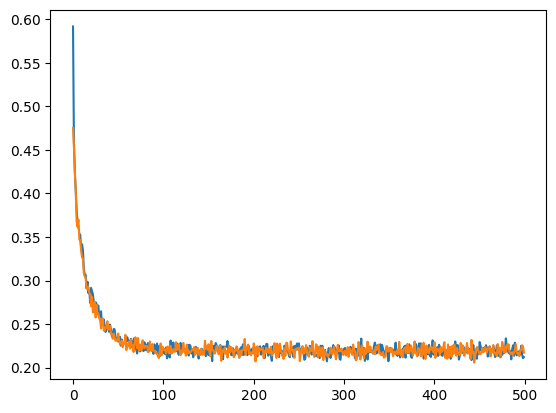

In [ ]:
torch.save(model.state_dict(), f"models/trained_model_with_expending_v1")
train_loss_list_ = torch.stack(train_loss_list).detach().to('cpu').numpy()
train_loss_list_ = torch.stack(train_loss_list).detach().to('cpu').numpy()
plt.plot(train_loss_list_)
plt.plot(val_loss_list)
plt.savefig("loss/train_val_loss_list_with_expending.png")

In [10]:
with open("train_val_loss_list.p", 'rb') as file:
    a = pickle.load(file)
a

{'train_loss_list': [tensor(0.5917, requires_grad=True),
  tensor(0.4591, requires_grad=True),
  tensor(0.4260, requires_grad=True),
  tensor(0.4022, requires_grad=True),
  tensor(0.3809, requires_grad=True),
  tensor(0.3673, requires_grad=True),
  tensor(0.3624, requires_grad=True),
  tensor(0.3536, requires_grad=True),
  tensor(0.3525, requires_grad=True),
  tensor(0.3368, requires_grad=True),
  tensor(0.3417, requires_grad=True),
  tensor(0.3346, requires_grad=True),
  tensor(0.3135, requires_grad=True),
  tensor(0.3065, requires_grad=True),
  tensor(0.3065, requires_grad=True),
  tensor(0.2910, requires_grad=True),
  tensor(0.2986, requires_grad=True),
  tensor(0.2855, requires_grad=True),
  tensor(0.2887, requires_grad=True),
  tensor(0.2743, requires_grad=True),
  tensor(0.2916, requires_grad=True),
  tensor(0.2877, requires_grad=True),
  tensor(0.2842, requires_grad=True),
  tensor(0.2753, requires_grad=True),
  tensor(0.2641, requires_grad=True),
  tensor(0.2752, requires_grad=

In [ ]:
train_dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "train", cropping = True, mask_expending = False)
train_data_loader = TaskDataloader(train_dataset, batch_size = 10)

val_dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "val")
val_data_loader = TaskDataloader(train_dataset, batch_size = 10)

model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(pretrained=True)
model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features=1024, out_features=21, bias=True)
model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features=1024, out_features=84, bias=True)
model.roi_heads.mask_predictor.mask_fcn_logits = torch.nn.Conv2d(256, 21, kernel_size=(1, 1), stride=(1, 1))
model.to(device)

CLASS_NUM = Task.CLASS_NUM
MASK_THRESHOLD = 0.5
SCORE_THRESHOLDS = Task.SCORE_THRESHOLDS

epoch = 200

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)

train_loss_list = []
val_loss_list = []
for e in range(epoch):
    # train_loss 계산 및 학습
    train_loss = mrv.train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq = 10)
    train_loss_list.append(train_loss)

    # m번에 한 번씩만 val_loss 계산
    m = 1
    val_loss = Task.loss_eval(model, device, val_data_loader) if (e % m == 0) else val_loss_list[-1]        
    val_loss_list.append(val_loss)

    print(f"epoch({e+1}) train_loss: {train_loss} val_loss: {val_loss}")

    if (e+1)%10 == 0:
        torch.save(model.state_dict(), f"models/trained_model_with_expending_v1({e+1}-epoch)")

In [ ]:
torch.save(model.state_dict(), f"models/trained_model_with_expending_v1")
train_loss_list_ = torch.stack(train_loss_list).detach().to('cpu').numpy()
train_loss_list_ = torch.stack(train_loss_list).detach().to('cpu').numpy()
plt.plot(train_loss_list_)
plt.plot(val_loss_list)
plt.savefig("train_val_loss.png")